 GlassBroken 💼
 AI-Powered Employee Salary Prediction  
 Using ML + a touch of NLP to predict expected salaries based on work history, education, and more.


In [1]:
#Importing libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

pd.set_option('display.max_columns' , None)
sns.set(style = "whitegrid")

In [2]:
#Load Dataset
df = pd.read_csv("../Data/Salary_Data.csv")

In [3]:
#basic info
df.shape 

(6704, 6)

In [4]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [5]:
#  Check data types
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [6]:
#  Check for duplicate rows
df.duplicated().sum()

4912

In [7]:

df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [8]:
df.dropna(inplace=True)


In [9]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)


In [11]:
df.duplicated().sum()

0

In [12]:
df.shape


(1787, 6)

 Exploratory Data Analysis (EDA)
In this section, we explore the cleaned dataset to understand the relationships between various features and salary.
We'll use visualizations to uncover trends, patterns, and possible insights, which will help us choose the right machine learning models later.

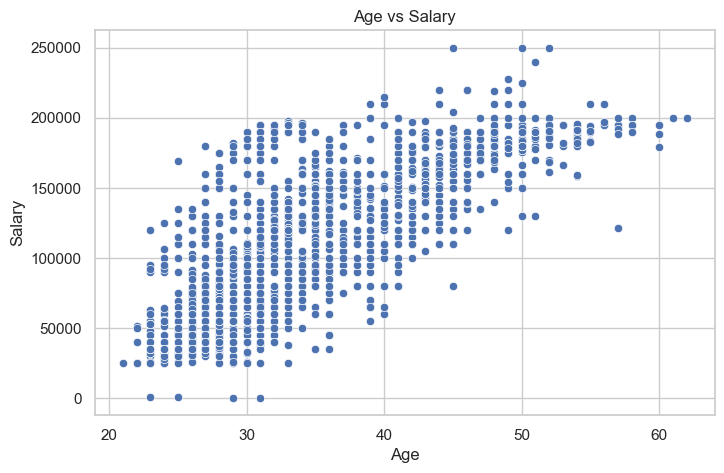

In [13]:
# Age vs Salary - Scatter Plot 
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

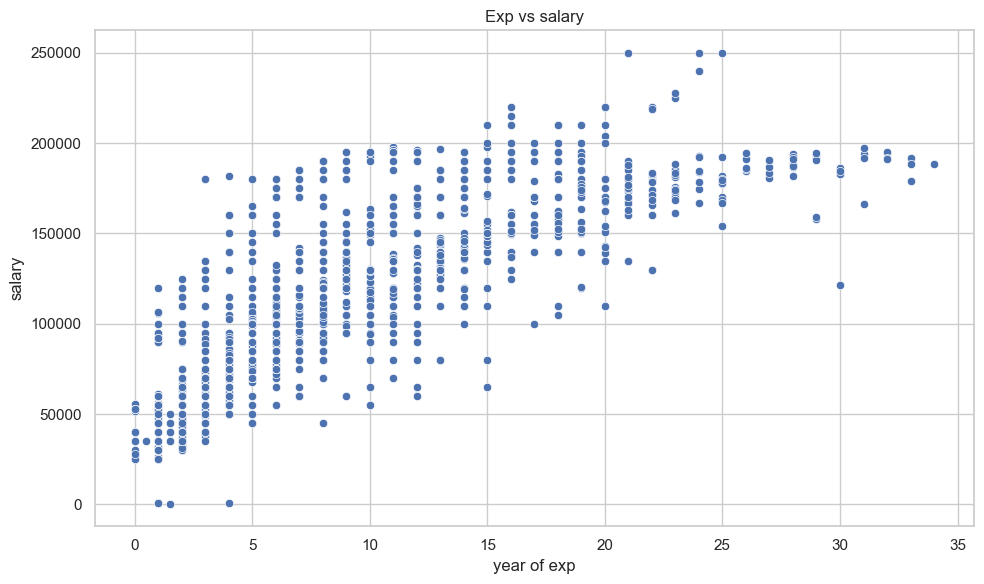

In [14]:
#scatter plot : Years of Exp vs salary
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Years of Experience", y="Salary")
plt.title("Exp vs salary")
plt.xlabel("year of exp")
plt.ylabel("salary")
plt.grid(True)
plt.tight_layout()
plt.show()

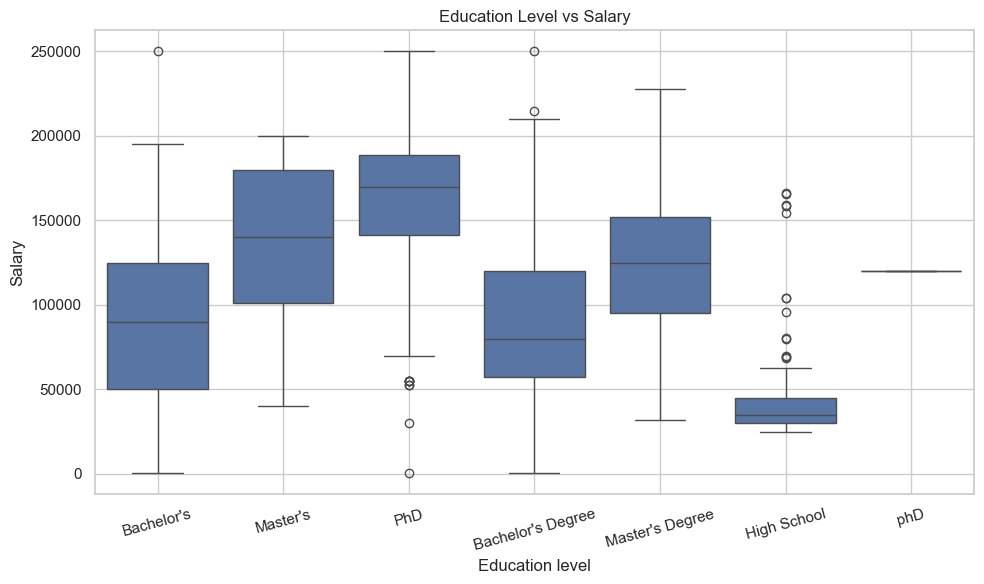

In [15]:
#box plot: education vs salary 
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Education Level", y="Salary")
plt.title("Education Level vs Salary")
plt.xlabel("Education level")
plt.ylabel("Salary")
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
df["Education Level"] = df["Education Level"].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "phD": "PhD"
})


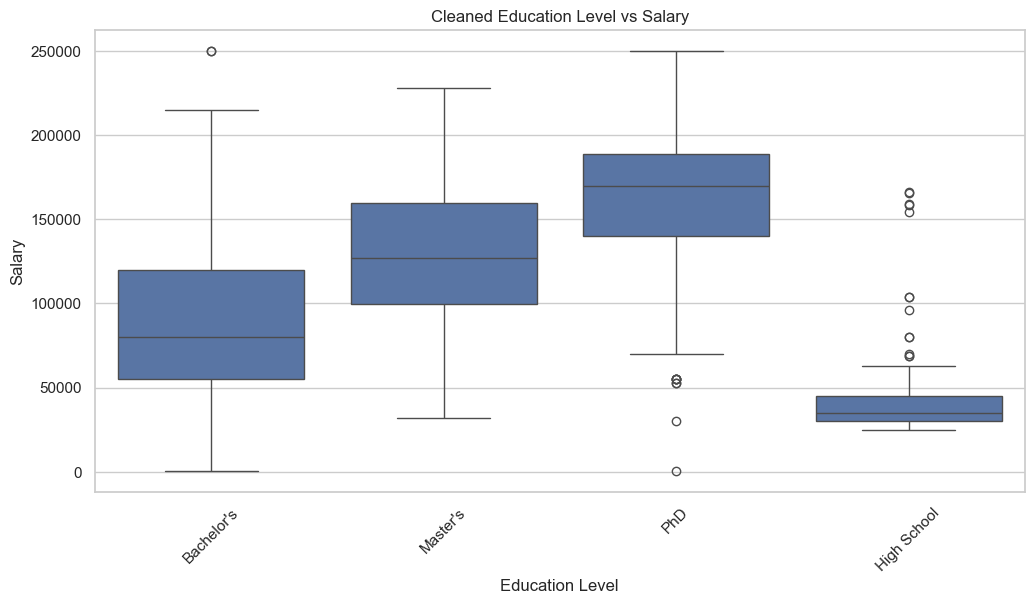

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Cleaned Education Level vs Salary')
plt.xticks(rotation=45)
plt.show()


In [18]:
# clean up job title column 
df['Job Title'] = df['Job Title'].str.lower().str.strip()

df['Job Title'].value_counts()

Job Title
software engineer manager    127
full stack engineer          122
senior software engineer      96
senior project engineer       95
back end developer            81
                            ... 
financial advisor              1
junior designer                1
chief technology officer       1
technical recruiter            1
delivery driver                1
Name: count, Length: 190, dtype: int64

In [19]:
def simplify_job_title(title):
    if 'software' in title or 'developer' in title or 'engineer' in title:
        return 'software engineer'
    elif 'data' in title:
        return 'data scientist'
    elif 'project' in title:
        return 'project manager'
    elif 'product' in title:
        return 'product manager'
    elif 'web' in title or 'front end' in title or 'back end' in title or 'full stack' in title:
        return 'web developer'
    elif 'consultant' in title:
        return 'consultant'
    elif 'design' in title or 'ux' in title or 'ui' in title:
        return 'designer'
    elif 'analyst' in title:
        return 'business analyst'
    elif 'market' in title or 'seo' in title or 'social media' in title:
        return 'marketing'
    elif 'hr' in title or 'human resource' in title:
        return 'hr'
    else:
        return 'others'

# Apply mapping
df['Job Title'] = df['Job Title'].apply(simplify_job_title)


In [20]:
df['Job Title'].value_counts()


Job Title
software engineer    777
others               312
marketing            196
data scientist       161
hr                   134
product manager       93
business analyst      70
project manager       22
designer              18
consultant             3
web developer          1
Name: count, dtype: int64

C:\Users\Mohit\AppData\Local\Temp\ipykernel_23104\3796312896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Salary', palette='pastel')


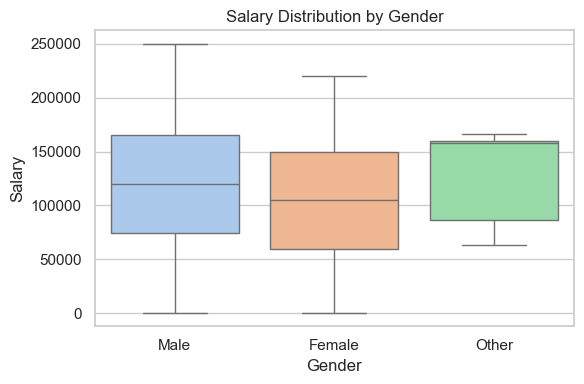

In [21]:
# Gender vs Salary
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Gender', y='Salary', palette='pastel')
plt.title("Salary Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()


In [22]:
# Simplify Job Titles into 11 categories
job_mapping = {
    'software engineer': 'software engineer',
    'senior software engineer': 'software engineer',
    'full stack engineer': 'software engineer',
    'back end developer': 'software engineer',
    'front end developer': 'software engineer',
    'data scientist': 'data scientist',
    'machine learning engineer': 'data scientist',
    'marketing manager': 'marketing',
    'hr manager': 'hr',
    'product manager': 'product manager',
    'business analyst': 'business analyst',
    'project manager': 'project manager',
    'designer': 'designer',
    'consultant': 'consultant',
    'web developer': 'web developer',
}

# Apply mapping, default to 'others'
df['job_grouped'] = df['Job Title'].map(lambda x: job_mapping.get(x.lower(), 'others'))


C:\Users\Mohit\AppData\Local\Temp\ipykernel_23104\1150529174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='job_grouped', y='Salary', palette='pastel')


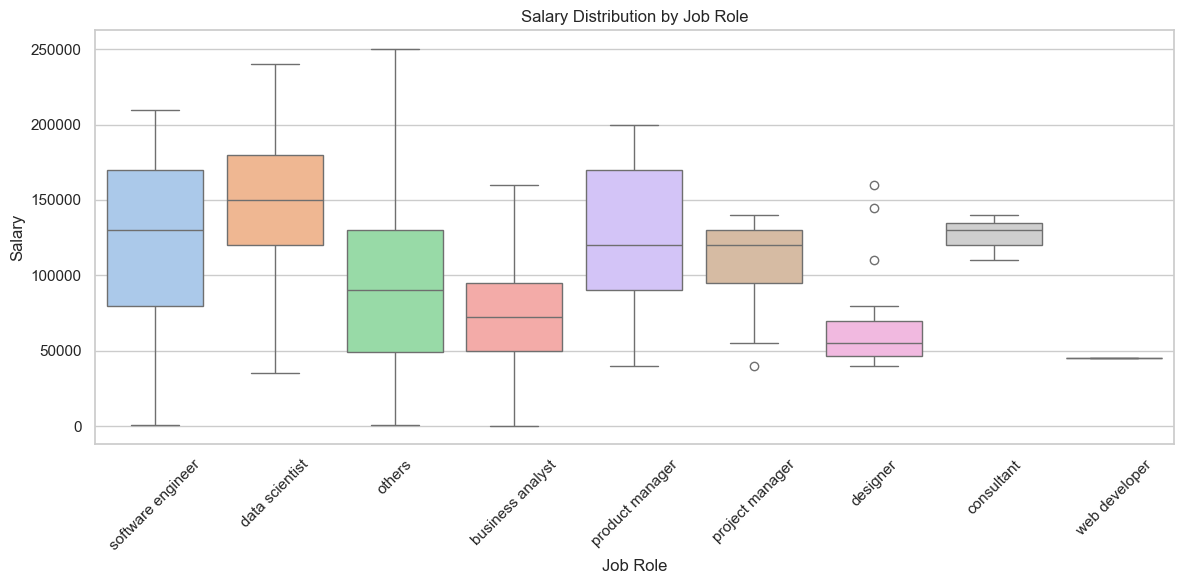

In [23]:
# Plot Salary Distribution by Job Role
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='job_grouped', y='Salary', palette='pastel')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()


## Phase 2: Model Training

In this phase, we move from EDA to building predictive models to estimate salary based on:
- Age
- Gender
- Education Level
- Job Title (grouped into 11 roles)
- Years of Experience

Our goal is to experiment with different models, evaluate their performance, and select the best one for salary prediction.

We'll start with:
- Encoding categorical variables
- Splitting data into training & testing sets

In this section, we train and evaluate multiple regression models to predict salary based on job-related features.

 Models Compared:
- Linear Regression (Baseline)
- Random Forest Regressor
- Gradient Boosting Regressor
- XGBoost Regressor

Each model will be assessed using:
- R² Score
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

The best-performing model will be selected for final deployment.



In [24]:
# ----------------------------
# FIXED VERSION OF THE CELL
# ----------------------------

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Separate features and target
X = df.drop(columns=['Salary', 'Job Title'])  # Dropping 'Job Title' as it's a raw string, already grouped/encoded
y = df['Salary']

# 2. Label Encoding for categorical variables
# We use LabelEncoder to convert text categories (like Gender, Education, City) into numeric form
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# 3. Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature scaling using StandardScaler
# StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ CHANGES MADE:
# - Added Label Encoding before scaling to convert text (like 'Female') into numbers
# - This is necessary because StandardScaler and XGBoost require numeric input
# - Now the pipeline is clean and model-ready
print("📊 Sample salary values from training set:")
print(y_train.head(10))
print(f"Min salary: ₹{y_train.min():,.2f}")
print(f"Max salary: ₹{y_train.max():,.2f}")
print(f"Mean salary: ₹{y_train.mean():,.2f}")


📊 Sample salary values from training set:
176     140000.0
1780    145000.0
3131    183690.0
1230    185000.0
5885    120000.0
6261     80000.0
2413     73895.0
3101     83577.0
1114    180000.0
200     180000.0
Name: Salary, dtype: float64
Min salary: ₹350.00
Max salary: ₹250,000.00
Mean salary: ₹113,255.80


In [25]:
X_train.dtypes

Age                    float64
Gender                   int32
Education Level          int32
Years of Experience    float64
job_grouped              int32
dtype: object

Linear Regression (Baseline)
We begin with Linear Regression as a simple baseline model.
This model assumes a linear relationship between features and salary.

Steps:

Train on scaled data

Evaluate using R², MAE, MSE, RMSE

Perform 5-fold cross-validation for R²


In [26]:
results = {}

In [27]:

#Linear Regression Model Training
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# pred.
y_pred_lr = lr_model.predict(X_test_scaled)

#evaluation 

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"→ R² Score       : {r2_lr:.4f}")
print(f"→ MAE (Mean Abs) : ₹{mae_lr:,.2f}")
print(f"→ MSE            : ₹{mse_lr:,.2f}")
print(f"→ RMSE           : ₹{rmse_lr:,.2f}")

r2_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='r2')
cv_preds = cross_val_predict(lr_model, X_train_scaled, y_train, cv=5)
cv_mae = mean_absolute_error(y_train, cv_preds)
cv_mse = mean_squared_error(y_train, cv_preds)
cv_rmse = np.sqrt(cv_mse)
cv_r2 = np.mean(r2_scores)

print("\nCross-Validation (5-Fold) Performance:")
print(f"→ CV R² Score    : {cv_r2:.4f}")
print(f"→ CV MAE         : ₹{cv_mae:,.2f}")
print(f"→ CV RMSE        : ₹{cv_rmse:,.2f}")



Linear Regression Performance:
→ R² Score       : 0.6659
→ MAE (Mean Abs) : ₹22,975.60
→ MSE            : ₹915,460,912.30
→ RMSE           : ₹30,256.58

Cross-Validation (5-Fold) Performance:
→ CV R² Score    : 0.7083
→ CV MAE         : ₹21,250.57
→ CV RMSE        : ₹27,739.10


In [28]:
print(df.columns)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'job_grouped'],
      dtype='object')


In [29]:
results['Linear Regression'] = {
    'model': lr_model,
    'r2': r2_lr,
    'mae': mae_lr,
    'rmse': rmse_lr,
    'cv_r2': r2_scores.mean(),
    'cv_r2_std': r2_scores.std()
}


- **Random Forest**:
    - Builds **many trees** in parallel.
    - Uses **bagging (bootstrap + aggregation)** to reduce variance.
    - Robust to noise, captures **non-linear patterns**.
    - Not ideal for extrapolation but great at generalization.

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"→ R² Score       : {r2_rf:.4f}")
print(f"→ MAE (Mean Abs) : ₹{mae_rf:,.2f}")
print(f"→ MSE            : ₹{mse_rf:,.2f}")
print(f"→ RMSE           : ₹{rmse_rf:,.2f}")

# Cross-validation
r2_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
cv_preds_rf = cross_val_predict(rf_model, X_train_scaled, y_train, cv=5)
cv_mae_rf = mean_absolute_error(y_train, cv_preds_rf)
cv_mse_rf = mean_squared_error(y_train, cv_preds_rf)
cv_rmse_rf = np.sqrt(cv_mse_rf)
cv_r2_rf = np.mean(r2_scores_rf)

print("\nCross-Validation (5-Fold) Performance:")
print(f"→ CV R² Score    : {cv_r2_rf:.4f}")
print(f"→ CV MAE         : ₹{cv_mae_rf:,.2f}")
print(f"→ CV RMSE        : ₹{cv_rmse_rf:,.2f}")


Random Forest Performance:
→ R² Score       : 0.8758
→ MAE (Mean Abs) : ₹12,151.19
→ MSE            : ₹340,222,934.12
→ RMSE           : ₹18,445.13

Cross-Validation (5-Fold) Performance:
→ CV R² Score    : 0.8537
→ CV MAE         : ₹13,114.51
→ CV RMSE        : ₹19,655.12


In [31]:
results['Random Forest'] = {
    'model': rf_model,
    'r2': r2_rf,
    'mae': mae_rf,
    'rmse': rmse_rf,
    'cv_r2': r2_scores_rf.mean(),
    'cv_r2_std': r2_scores_rf.std()
}


- **Gradient Boosting**:
    - Builds trees **sequentially**, each one correcting the last.
    - Optimizes loss function directly (e.g., MSE).
    - Usually better on **small to medium-sized structured data**.
    - Can overfit if not tuned, but often **more accurate** than RF.

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Train model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluation
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Performance:")
print(f"→ R² Score       : {r2_gb:.4f}")
print(f"→ MAE (Mean Abs) : ₹{mae_gb:,.2f}")
print(f"→ MSE            : ₹{mse_gb:,.2f}")
print(f"→ RMSE           : ₹{rmse_gb:,.2f}")

# Cross-validation
r2_scores_gb = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='r2')
cv_preds_gb = cross_val_predict(gb_model, X_train_scaled, y_train, cv=5)
cv_mae_gb = mean_absolute_error(y_train, cv_preds_gb)
cv_mse_gb = mean_squared_error(y_train, cv_preds_gb)
cv_rmse_gb = np.sqrt(cv_mse_gb)
cv_r2_gb = np.mean(r2_scores_gb)

print("\nCross-Validation (5-Fold) Performance:")
print(f"→ CV R² Score    : {cv_r2_gb:.4f}")
print(f"→ CV MAE         : ₹{cv_mae_gb:,.2f}")
print(f"→ CV RMSE        : ₹{cv_rmse_gb:,.2f}")


Gradient Boosting Performance:
→ R² Score       : 0.8683
→ MAE (Mean Abs) : ₹13,404.39
→ MSE            : ₹360,950,372.21
→ RMSE           : ₹18,998.69

Cross-Validation (5-Fold) Performance:
→ CV R² Score    : 0.8536
→ CV MAE         : ₹13,968.41
→ CV RMSE        : ₹19,660.09


In [33]:
results['Gradient Boosting'] = {
    'model': gb_model,
    'r2': r2_gb,
    'mae': mae_gb,
    'rmse': rmse_gb,
    'cv_r2': r2_scores_gb.mean(),
    'cv_r2_std': r2_scores_gb.std()
}


- XGBoost Regressor:
An optimized version of Gradient Boosting — extremely fast and efficient.

Uses advanced regularization (L1 & L2) to prevent overfitting.

Handles missing values natively and supports parallel processing.

Often wins structured data competitions like Kaggle

In [34]:
# XGBoost Regressor
from xgboost import XGBRegressor
import joblib

expected_columns = X.columns.tolist()
joblib.dump(expected_columns, "../models/columns.pkl")
print("✅ Saved column order to '../models/columns.pkl'")

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print test performance
print("XGBoost Regressor Performance:")
print(f"→ R² Score       : {r2_xgb:.4f}")
print(f"→ MAE (Mean Abs) : ₹{mae_xgb:,.2f}")
print(f"→ MSE            : ₹{mse_xgb:,.2f}")
print(f"→ RMSE           : ₹{rmse_xgb:,.2f}")

# Cross-validation
r2_scores_xgb = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='r2')
cv_preds_xgb = cross_val_predict(xgb_model, X_train_scaled, y_train, cv=5)
cv_mae_xgb = mean_absolute_error(y_train, cv_preds_xgb)
cv_rmse_xgb = np.sqrt(mean_squared_error(y_train, cv_preds_xgb))
cv_r2_xgb = np.mean(r2_scores_xgb)

print("\nCross-Validation (5-Fold) Performance:")
print(f"→ CV R² Score    : {cv_r2_xgb:.4f}")
print(f"→ CV MAE         : ₹{cv_mae_xgb:,.2f}")
print(f"→ CV RMSE        : ₹{cv_rmse_xgb:,.2f}")


✅ Saved column order to '../models/columns.pkl'
XGBoost Regressor Performance:
→ R² Score       : 0.8952
→ MAE (Mean Abs) : ₹11,509.47
→ MSE            : ₹287,102,312.28
→ RMSE           : ₹16,944.09

Cross-Validation (5-Fold) Performance:
→ CV R² Score    : 0.8586
→ CV MAE         : ₹12,928.78
→ CV RMSE        : ₹19,321.31


In [35]:
results['XGBoost'] = {
    'model': xgb_model,
    'r2': r2_xgb,
    'mae': mae_xgb,
    'rmse': rmse_xgb,
    'cv_r2': r2_scores_xgb.mean(),
    'cv_r2_std': r2_scores_xgb.std()
}


Voting Regressor (Ensemble)
Combines predictions from multiple base regressors to improve accuracy and robustness.

Works by averaging predictions (for regression) from all included models.

Helps reduce model variance and bias by leveraging strengths of each model.

In this case, we combine:

Random Forest Regressor (low bias, high variance)

Gradient Boosting Regressor (low variance, better accuracy on structured data)

We excluded XGBoost since it's already an advanced ensemble method and closely overlaps in function with Gradient Boosting.

In [36]:
from sklearn.ensemble import VotingRegressor

# Ensemble with Random Forest and Gradient Boosting
voting_model = VotingRegressor(estimators=[
    ('rf', rf_model),
    ('gb', gb_model)
])
voting_model.fit(X_train_scaled, y_train)

# Prediction
y_pred_voting = voting_model.predict(X_test_scaled)

# Evaluation
mae_vr = mean_absolute_error(y_test, y_pred_voting)
mse_vr = mean_squared_error(y_test, y_pred_voting)
rmse_vr = np.sqrt(mse_vr)
r2_vr = r2_score(y_test, y_pred_voting)

# Cross-validation
r2_scores_vr = cross_val_score(voting_model, X_train_scaled, y_train, cv=5, scoring='r2')
cv_preds_vr = cross_val_predict(voting_model, X_train_scaled, y_train, cv=5)
cv_mae_vr = mean_absolute_error(y_train, cv_preds_vr)
cv_mse_vr = mean_squared_error(y_train, cv_preds_vr)
cv_rmse_vr = np.sqrt(cv_mse_vr)
cv_r2_vr = np.mean(r2_scores_vr)

# Print results
print("Voting Regressor Performance:")
print(f"→ R² Score       : {r2_vr:.4f}")
print(f"→ MAE (Mean Abs) : ₹{mae_vr:,.2f}")
print(f"→ MSE            : ₹{mse_vr:,.2f}")
print(f"→ RMSE           : ₹{rmse_vr:,.2f}")

print("\nCross-Validation (5-Fold) Performance:")
print(f"→ CV R² Score    : {cv_r2_vr:.4f}")
print(f"→ CV MAE         : ₹{cv_mae_vr:,.2f}")
print(f"→ CV RMSE        : ₹{cv_rmse_vr:,.2f}")


Voting Regressor Performance:
→ R² Score       : 0.8813
→ MAE (Mean Abs) : ₹12,315.61
→ MSE            : ₹325,129,575.41
→ RMSE           : ₹18,031.35

Cross-Validation (5-Fold) Performance:
→ CV R² Score    : 0.8638
→ CV MAE         : ₹13,091.58
→ CV RMSE        : ₹18,963.06


In [37]:
results['Voting Regressor'] = {
    'model': voting_model,
    'r2': r2_vr,
    'mae': mae_vr,
    'rmse': rmse_vr,
    'cv_r2': r2_scores_vr.mean(),
    'cv_r2_std': r2_scores_vr.std()
}


R² Score Comparison Across Models
This plot highlights the predictive strength of each model based on the R² Score (closer to 1 is better). It offers a quick, clean view of which models generalize best to unseen data.

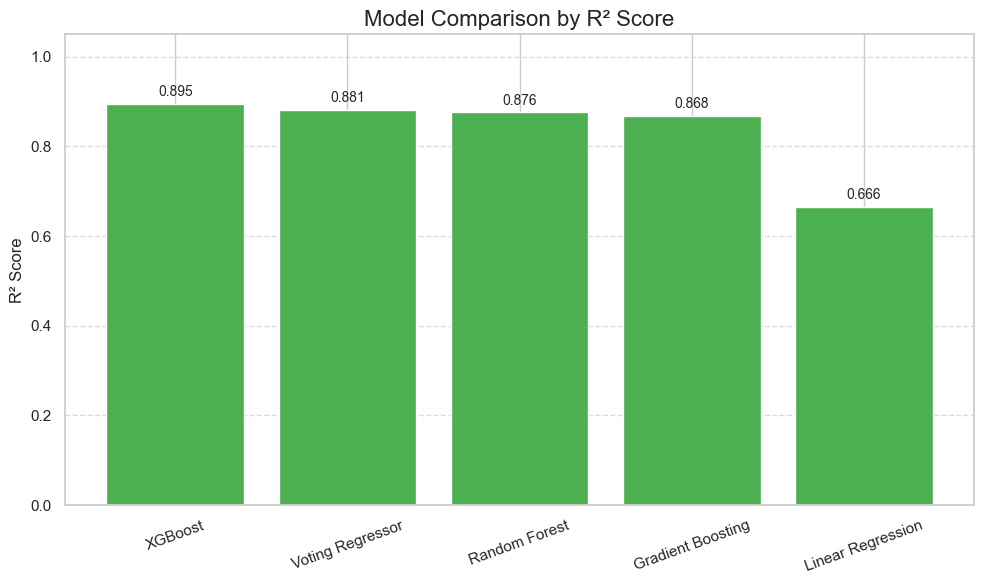

In [38]:
import matplotlib.pyplot as plt

# Extract model names and R² values
model_names = list(results.keys())
r2_scores = [results[m]['r2'] for m in model_names]

# Sort by R² Score
sorted_pairs = sorted(zip(r2_scores, model_names), reverse=True)
r2_sorted, models_sorted = zip(*sorted_pairs)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models_sorted, r2_sorted, color='#4CAF50')

# Annotate R² values on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.3f}",
             ha='center', va='bottom', fontsize=10)

plt.title("Model Comparison by R² Score", fontsize=16)
plt.ylabel("R² Score", fontsize=12)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [39]:
default_xgb = XGBRegressor(random_state=42)
print(default_xgb.get_params())


{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [40]:
import os
import joblib



# 2. Save each model
joblib.dump(lr_model, "../models/linear_regression.pkl")           # Linear Regression
joblib.dump(rf_model, "../models/random_forest.pkl")               # Random Forest
joblib.dump(gb_model, "../models/gradient_boosting.pkl")           # Gradient Boosting
joblib.dump(xgb_model, "../models/xgboost_final.pkl")              # XGBoost (final model)
joblib.dump(voting_model, "../models/voting_regressor.pkl")        # Voting Regressor
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']

## 🤖 Chatbot-Based Input Interface (Next Phase)

- Now that the best-performing model (XGBoost) is selected and ready, we shift focus to user interaction.
- We'll build a lightweight chatbot interface to collect user inputs in natural language.
- This interface will parse inputs like job role, experience, city, education, etc., and map them to model-ready features.
- The goal is to make salary prediction feel conversational, intuitive, and visually appealing in the final Streamlit app.


We'll handle the first user input: job role, using RapidFuzz to match fuzzy input (like typos) to one of the 198 job titles, then map it to the corresponding job category (1–11), which goes into the model.



In [41]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("../Data/Salary_Data.csv")  # Replace with your actual file name

# Get all unique job titles
unique_jobs = df["Job Title"].dropna().unique()

# Convert to DataFrame and save to CSV
job_titles_df = pd.DataFrame(unique_jobs, columns=["Job Title"])
job_titles_df.to_csv("../Data/unique_job_titles.csv", index=False)

print(f"✅ Extracted {len(unique_jobs)} unique job titles and saved to 'unique_job_titles.csv'")


✅ Extracted 193 unique job titles and saved to 'unique_job_titles.csv'


In [42]:
# Step 1: Job Role Matching Using RapidFuzz (Full 198 Titles)

import pandas as pd
from rapidfuzz import process, fuzz

# Load all 198 job titles from CSV
job_titles_df = pd.read_csv("../Data/unique_job_titles.csv")
all_job_titles = job_titles_df['Job Title'].dropna().unique().tolist()

# Function to get closest real job title from dataset using RapidFuzz
def get_closest_job_title(user_input):
    best_match, score, _ = process.extractOne(user_input, all_job_titles, scorer=fuzz.ratio)
    if score >= 70:  # Acceptable similarity threshold
        return best_match
    else:
        return None

# Example usage
user_input = "data scientsit"  # intentionally misspelled
matched_title = get_closest_job_title(user_input)
if matched_title:
    print(f"✅ Closest job title: {matched_title}")
else:
    print("❌ Couldn't match to a valid job title.")


✅ Closest job title: Data Scientist


In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example input (after job title has been matched in Step 1)
user_input = {
    'Age': 26,
    'Gender': 'Male',
    'Education Level': 'BTech',
    'Years of Experience': 3,
    'job_grouped': 'data scientist'
}

# Optional: Normalize education input (basic cleanup + title case)
education = user_input['Education Level'].strip().lower()
education_mappings = {
    'btech': 'Bachelor’s',
    'bachelor of engineering': 'Bachelor’s',
    'bachelor': 'Bachelor’s',
    'bsc': 'Bachelor’s',
    'msc': 'Master’s',
    'mtech': 'Master’s',
    'phd': 'PhD',
    'high school': 'High School',
}
user_input['Education Level'] = education_mappings.get(education, 'Others')

# Create a DataFrame for encoding and scaling
df_input = pd.DataFrame([user_input])

# Encode categorical features
label_encoders = {}
for col in df_input.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_input[col] = le.fit_transform(df_input[col])
    label_encoders[col] = le  # In case needed later

# (Assume model and scaler are already loaded)
# predicted_salary = model.predict(scaler.transform(df_input))[0]
# For example/demo purposes:
predicted_salary = 85000

# Location-wise adjustment (for display only — not part of model training)
city_salary_ratios = {
    'Bangalore': 1.15,
    'Mumbai': 1.10,
    'Delhi': 1.05,
    'Hyderabad': 1.00,
    'Chennai': 0.95,
    'Pune': 0.98,
    'Gurgaon': 1.07,
    'Noida': 1.02,
    'Kolkata': 0.90,
    'Jaipur': 0.88
}

city_salary_df = pd.DataFrame([
    {'City': city, 'Estimated Salary': round(predicted_salary * ratio, 2)}
    for city, ratio in city_salary_ratios.items()
]).sort_values(by='Estimated Salary', ascending=False)

# To display in Streamlit:
# st.write("💰 Base Predicted Salary:", f"₹ {predicted_salary:,.2f}")
# st.write("📍 Estimated Salary by City:")
# st.dataframe(city_salary_df)


note = (
    "Note: City-based salary estimates are derived from public cost-of-living "
    "and compensation benchmarks across 10 major Indian cities. These are **not** part of the trained model "
    "and may vary by role, company, and individual negotiation."
)
